In [111]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import librosa
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

INDEX = 13
DATA_DIR = './new-test-data/test-mfcc-v2' #update with where you stored the file
DATA2_DIR = './new-test-data/test-mfcc-v2-copy'
def aggregate_mfcc_selective(mfcc_data):
    mfcc_selected = mfcc_data[INDEX:, :]
    #features for data from 13-20
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

def aggregate_mfcc_selective2(mfcc_data):
    mfcc_selected = mfcc_data[:3, :] # Select first 20 MFCCs
    
    mfcc_mean = np.mean(mfcc_selected, axis=1)
    mfcc_std = np.std(mfcc_selected, axis=1)
    mfcc_max = np.max(mfcc_selected, axis=1)
    mfcc_min = np.min(mfcc_selected, axis=1)
    
    features = np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min])
    return features

# total number of files in the directory
total_files = len(os.listdir(DATA_DIR))
index = 1

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []
total_songs = len(os.listdir(DATA_DIR))
# Iterate over all files in the specified directory
for file_name in os.listdir(DATA_DIR):
        file_path = os.path.join(DATA_DIR, file_name)
        file_path2 = os.path.join(DATA2_DIR, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])

        # Determine label based on filename pattern
        if file_name.startswith('Asha-Bhosle'):
            label = 'Asha Bhosle'
        elif file_name.startswith('Kishore-Kumar'):
            label = 'Kishore Kumar'
        elif file_name.startswith('Lavni'):
            label = 'Lavni'
        elif file_name.startswith('Michael-Jackson'):
            label = 'Michael Jackson'
        elif file_name.startswith('Jana-Gana-Mana'):
            label = 'Jana-Gana-Mana'
        elif file_name.startswith('Bhavgeet'):
             label = 'Bhavgeet'
        else:
            print(f'Unknown label for file: {file_name}')
            
        print(f'Processed {file_name}')
        print(f'Processed {index} of {total_songs}')
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)
        index += 1

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

total_data_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_df.insert(0, 'File', file_names)
total_data_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_df.to_csv(f'features_generated_{INDEX}.csv', index=False)


Processed Asha-Bhosle-23.csv
Processed 1 of 495
Processed Michael-Jackson-55.csv
Processed 2 of 495
Processed Kishore-Kumar-63.csv
Processed 3 of 495
Processed Asha-Bhosle-32.csv
Processed 4 of 495
Processed Jana-Gana-Mana-8-MFCC.csv
Processed 5 of 495
Processed Bhavgeet-47.csv
Processed 6 of 495
Processed Lavni-20.csv
Processed 7 of 495
Processed Bhavgeet-61.csv
Processed 8 of 495
Processed Michael-Jackson-42.csv
Processed 9 of 495
Processed Asha-Bhosle-71.csv
Processed 10 of 495
Processed Bhavgeet-14.csv
Processed 11 of 495
Processed Michael-Jackson-17.csv
Processed 12 of 495
Processed Bhavgeet-18.csv
Processed 13 of 495
Processed Asha-Bhosle-47.csv
Processed 14 of 495
Processed Kishore-Kumar-5-MFCC.csv
Processed 15 of 495
Processed Michael-Jackson-24.csv
Processed 16 of 495
Processed Bhavgeet-5-MFCC.csv
Processed 17 of 495
Processed Michael-Jackson-71.csv
Processed 18 of 495
Processed Jana-Gana-Mana-49.csv
Processed 19 of 495
Processed Asha-Bhosle-66.csv
Processed 20 of 495
Processe

In [4]:
import re

UNLABELLED_DIR = './data-v2'
UNLABELLED_DIR2 = './data-v2-copy'
# total number of files in the directory
total_files = len(os.listdir(DATA_DIR))
index = 1

# Initialize lists to store features, file names, and labels
mfcc_all_songs = []
file_names = []
generated_features = []
labels = []
total_songs = len(os.listdir(UNLABELLED_DIR))

# Function to extract the numeric part of the filename
def extract_number(file_name):
    match = re.search(r'(\d+)-MFCC.csv', file_name)
    if match:
        return int(match.group(1))
    return float('inf')  # In case the file doesn't match the pattern

# Sort files based on the numeric part of the filename
file_list = sorted(os.listdir(UNLABELLED_DIR), key=extract_number)

# Iterate over all files in the specified directory
for file_name in file_list:
        file_path = os.path.join(UNLABELLED_DIR, file_name)
        file_path2 = os.path.join(UNLABELLED_DIR2, file_name)
        mfcc_data = pd.read_csv(file_path, header=None).values
        mfcc_data = mfcc_data[:20]
        mfcc_data2 = pd.read_csv(file_path2, header=None).values
        # Compute aggregated MFCC features
        aggregated_features = aggregate_mfcc_selective(mfcc_data)
        aggregated_features2 = aggregate_mfcc_selective2(mfcc_data2)

        skewness = skew(mfcc_data, axis=1)
        kurt = kurtosis(mfcc_data, axis=1)
        range_max_min = np.ptp(mfcc_data, axis=1)

        total_energy = np.sum(mfcc_data ** 2, axis=1)
        energy_entropy = -np.sum(mfcc_data ** 2 * np.log(mfcc_data ** 2 + 1e-10), axis=1)
        q25 = np.percentile(mfcc_data, 25, axis=1)
        q75 = np.percentile(mfcc_data, 75, axis=1)
    
        delta_mfcc = librosa.feature.delta(mfcc_data, order=1)
        delta_delta_mfcc = librosa.feature.delta(mfcc_data, order=2)
        

        delta_mean = np.mean(delta_mfcc, axis=1)
        delta_std = np.std(delta_mfcc, axis=1)
        delta_max = np.max(delta_mfcc, axis=1)
        delta_min = np.min(delta_mfcc, axis=1)
        delta_skew = skew(librosa.feature.delta(mfcc_data), axis=1)
        delta_kurtosis = kurtosis(librosa.feature.delta(mfcc_data), axis=1)
        delta_range = np.ptp(librosa.feature.delta(mfcc_data), axis=1)
        delta_total_energy = np.sum(librosa.feature.delta(mfcc_data) ** 2, axis=1)
        delta_energy_entropy = -np.sum(librosa.feature.delta(mfcc_data) ** 2 * np.log(librosa.feature.delta(mfcc_data) ** 2 + 1e-10), axis=1)
        delta_q25 = np.percentile(delta_mfcc, 25, axis=1)
        delta_q75 = np.percentile(delta_mfcc, 75, axis=1)
            
        delta_delta_mean = np.mean(delta_delta_mfcc, axis=1)
        delta_delta_std = np.std(delta_delta_mfcc, axis=1)
        delta_delta_max = np.max(delta_delta_mfcc, axis=1)
        delta_delta_min = np.min(delta_delta_mfcc, axis=1)
        delta_delta_skew = skew(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_kurtosis = kurtosis(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_range = np.ptp(librosa.feature.delta(delta_delta_mfcc, order=2), axis=1)
        delta_delta_total_energy = np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2, axis=1)
        delta_delta_energy_entropy = -np.sum(librosa.feature.delta(delta_delta_mfcc, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q25 = np.percentile(delta_delta_mfcc, 25, axis=1)
        delta_delta_q75 = np.percentile(delta_delta_mfcc, 75, axis=1)

    
        delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=1)
        delta_delta_mfcc2 = librosa.feature.delta(mfcc_data2, order=2)
        delta_mean2 = np.mean(delta_mfcc2, axis=1)
        delta_std2 = np.std(delta_mfcc2, axis=1)
        delta_max2 = np.max(delta_mfcc2, axis=1)
        delta_min2 = np.min(delta_mfcc2, axis=1)
        delta_delta_mean2 = np.mean(delta_delta_mfcc2, axis=1)
        delta_delta_std2 = np.std(delta_delta_mfcc2, axis=1)
        delta_delta_max2 = np.max(delta_delta_mfcc2, axis=1)
        delta_delta_min2 = np.min(delta_delta_mfcc2, axis=1)
        delta_delta_range2 = np.ptp(delta_delta_mfcc2, axis=1)  
        delta_delta_total_energy2 = np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2, axis=1)
        delta_delta_energy_entropy2 = -np.sum(librosa.feature.delta(delta_delta_mfcc2, order=2) 
                                              ** 2 * np.log(librosa.feature.delta(delta_delta_mfcc2, order=2) ** 2 + 1e-10), axis=1)
        delta_delta_q252 = np.percentile(delta_delta_mfcc2, 25, axis=1)
        delta_delta_q752 = np.percentile(delta_delta_mfcc2, 75, axis=1)

        # PCA_mfcc = PCA(n_components=5)
        # PCA_mfcc.fit(mfcc_data.T)
        # PCA_mfcc_features = PCA_mfcc.components_.flatten()

        # Compile all features into a single vector
        features = np.concatenate([
            aggregated_features.flatten(),
            aggregated_features2.flatten(),
            range_max_min.flatten(),
            skewness.flatten(),
            kurt.flatten(),
            total_energy.flatten(),
            energy_entropy.flatten(),
            q25.flatten(),
            q75.flatten(),
            
            delta_mean.flatten(),
            delta_std.flatten(),
            delta_max.flatten(),
            delta_min.flatten(),
            delta_skew.flatten(),
            delta_kurtosis.flatten(),
            delta_range.flatten(),
            delta_total_energy.flatten(),
            delta_energy_entropy.flatten(),
            delta_q25.flatten(),
            delta_q75.flatten(),
            
            delta_delta_mean.flatten(),
            delta_delta_std.flatten(),
            delta_delta_max.flatten(),
            delta_delta_min.flatten(),
            delta_delta_skew.flatten(),
            delta_delta_kurtosis.flatten(),
            delta_delta_range.flatten(),
            delta_delta_total_energy.flatten(),
            delta_delta_energy_entropy.flatten(),
            delta_delta_q25.flatten(),
            delta_delta_q75.flatten(),
            
            delta_mean2.flatten(),
            delta_std2.flatten(),
            delta_max2.flatten(),
            delta_min2.flatten(),
            delta_delta_mean2.flatten(),
            delta_delta_std2.flatten(),
            delta_delta_max2.flatten(),
            delta_delta_min2.flatten(),
            delta_delta_total_energy2.flatten(),
            delta_delta_energy_entropy2.flatten(),
            delta_delta_q252.flatten(),
            delta_delta_q752.flatten(),

            # PCA_mfcc_features.flatten(),
        ])
            
        print(f'Processed {file_name}')
        print(f'Processed {index} of {total_songs}')
        generated_features.append(features)
        file_names.append(file_name)
        labels.append(label)
        index += 1

# Create DataFrame and save to CSV
generated_features = np.vstack(generated_features)
total_features = generated_features.shape[1]
feature_columns = [f'feature_{i}' for i in range(total_features)]

labels = 'NULL'
total_data_unlabelled_df = pd.DataFrame(generated_features, columns=feature_columns)
total_data_unlabelled_df.insert(0, 'File', file_names)
total_data_unlabelled_df.insert(1, 'Label', labels)

# Save generated features to 'features_generated.csv'
total_data_unlabelled_df.to_csv(f'unlabelled_features_generated_{INDEX}.csv', index=False)

complete_data = pd.concat([total_data_df, total_data_unlabelled_df], ignore_index=True)

Processed 01-MFCC.csv
Processed 1 of 116
Processed 02-MFCC.csv
Processed 2 of 116
Processed 03-MFCC.csv
Processed 3 of 116
Processed 04-MFCC.csv
Processed 4 of 116
Processed 05-MFCC.csv
Processed 5 of 116
Processed 06-MFCC.csv
Processed 6 of 116
Processed 07-MFCC.csv
Processed 7 of 116
Processed 08-MFCC.csv
Processed 8 of 116
Processed 09-MFCC.csv
Processed 9 of 116
Processed 10-MFCC.csv
Processed 10 of 116
Processed 11-MFCC.csv
Processed 11 of 116
Processed 12-MFCC.csv
Processed 12 of 116
Processed 13-MFCC.csv
Processed 13 of 116
Processed 14-MFCC.csv
Processed 14 of 116
Processed 15-MFCC.csv
Processed 15 of 116
Processed 16-MFCC.csv
Processed 16 of 116
Processed 17-MFCC.csv
Processed 17 of 116
Processed 18-MFCC.csv
Processed 18 of 116
Processed 19-MFCC.csv
Processed 19 of 116
Processed 20-MFCC.csv
Processed 20 of 116
Processed 21-MFCC.csv
Processed 21 of 116
Processed 22-MFCC.csv
Processed 22 of 116
Processed 23-MFCC.csv
Processed 23 of 116
Processed 24-MFCC.csv
Processed 24 of 116
P

In [5]:

# Splitting the data into features (X) and labels (y)
X = complete_data.drop(columns=['File', 'Label'])
y = complete_data['Label']


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of dataset:", complete_data.shape)
print("\nColumns in dataset:\n", complete_data.columns)
print("\nFirst 5 rows of the dataset:\n", complete_data.head())
print("\nData Types of each column:\n", complete_data.dtypes)
print("\nMissing values in each column:\n", complete_data.isnull().sum())

print("\nStatistical Summary:\n", complete_data.describe())
print("\nNumber of duplicate rows:", complete_data.duplicated().sum())

# plt.figure(figsize=(10, 8))
# sns.heatmap(X, annot=True, cmap='coolwarm', square=True)
# plt.title("Correlation Matrix")
# plt.show()
label_column = 'Label'
print(f"\nLabel distribution in '{label_column}':\n", complete_data[label_column].value_counts())
# label_column = 'Label'  # Replace 'label' with the actual name of the label column in your dataset
# if label_column in total_data_df.columns:
#     print(f"\nNumber of unique labels in '{label_column}':", df[label_column].nunique())
#     print(f"\nLabel distribution in '{label_column}':\n", df[label_column].value_counts())
# else:
#     print(f"\nWarning: Column '{label_column}' not found in the dataset.")


#Add a Correlation HeatMap

#too many features to analyse the plots of all of them manually 

Shape of dataset: (611, 658)

Columns in dataset:
 Index(['File', 'Label', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7',
       ...
       'feature_646', 'feature_647', 'feature_648', 'feature_649',
       'feature_650', 'feature_651', 'feature_652', 'feature_653',
       'feature_654', 'feature_655'],
      dtype='object', length=658)

First 5 rows of the dataset:
                         File            Label  feature_0  feature_1  \
0         Asha-Bhosle-23.csv      Asha Bhosle -12.033679  -9.780576   
1     Michael-Jackson-55.csv  Michael Jackson  -2.017992   4.719863   
2       Kishore-Kumar-63.csv    Kishore Kumar   2.609654  -4.029758   
3         Asha-Bhosle-32.csv      Asha Bhosle  -7.141288   2.708933   
4  Jana-Gana-Mana-8-MFCC.csv   Jana-Gana-Mana   0.578080   2.455614   

   feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  ...  \
0 -11.141942  -9.832152  -8.217274  -9.227260  -6.950433   9.64

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (scaling them to have mean 0 and std 1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

X_columns = X.columns

features_scaled_df = pd.DataFrame(features_scaled, columns=X_columns)
X = features_scaled_df
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_646,feature_647,feature_648,feature_649,feature_650,feature_651,feature_652,feature_653,feature_654,feature_655
0,-1.879924,-1.506874,-1.826547,-1.650989,-1.423729,-1.914222,-1.231581,0.271576,0.729758,0.217367,...,-0.412531,0.450566,-0.002394,-0.409435,-1.002998,-0.241976,0.316362,0.623544,0.365305,-0.337186
1,0.419660,1.722345,0.505256,1.757567,0.502464,1.129636,0.351265,-0.944944,-0.746070,-0.803920,...,0.906924,-1.011854,1.421913,1.116600,-1.542929,-0.734841,-0.560590,1.520704,0.597232,0.233375
2,1.482158,-0.226178,-0.249628,-0.846986,-0.418173,0.614931,-0.663209,-0.596129,-0.674325,-0.905168,...,0.972932,-0.974982,0.762701,0.890656,0.951301,-1.896138,-2.083974,-1.028208,1.923422,2.161224
3,-0.756640,1.274515,1.368609,-0.000844,0.646090,0.706165,0.674195,0.708456,0.967808,0.975013,...,0.178621,1.734313,0.489283,0.299001,-2.164560,-0.434755,-0.223589,1.949352,0.395036,0.237137
4,1.015713,1.218101,0.535349,0.188973,0.149084,0.635573,0.668984,-1.277467,-1.187331,-1.653361,...,-0.965341,-1.317421,-1.228748,-1.138623,1.366153,1.395591,1.140184,-1.382905,-1.436877,-1.139550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.925973,-1.251535,0.031800,0.775216,-0.514499,0.900251,1.853636,1.011093,1.257546,1.573328,...,-0.343806,0.029645,-0.615820,-0.365092,-0.673505,0.187560,-0.053727,0.860746,-0.171351,0.282202
607,-0.338537,0.184437,0.110758,-0.206720,0.961074,0.738822,0.310959,1.584429,1.396294,1.224846,...,-0.058010,0.595003,-0.008070,0.072239,0.262243,0.216272,0.234487,0.230419,-0.445377,-0.257285
608,0.245140,1.193131,-0.445248,0.739152,-0.159610,0.664055,-0.384713,-0.167446,-0.613191,-0.589776,...,-0.518456,-0.234228,-0.754117,-0.466086,1.203695,1.434571,1.152423,-0.953467,-1.384936,-1.081409
609,0.509487,1.065715,0.676211,1.146552,1.014801,1.512249,1.811500,1.598824,1.298712,1.499364,...,-0.239299,-0.075905,-0.622898,-0.230613,0.927169,1.132398,0.729150,-0.676107,-1.056790,-0.792355


In [8]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a threshold
selector = VarianceThreshold(threshold=0.1)
print(X.shape)
X_selected = selector.fit_transform(X)
print(X_selected.shape)
X_selected = pd.DataFrame(X_selected, columns=X.columns[selector.get_support()])


(611, 656)
(611, 656)


Shape after dropping constant/correlated features: (611, 376)


/home/nirav24/.local/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


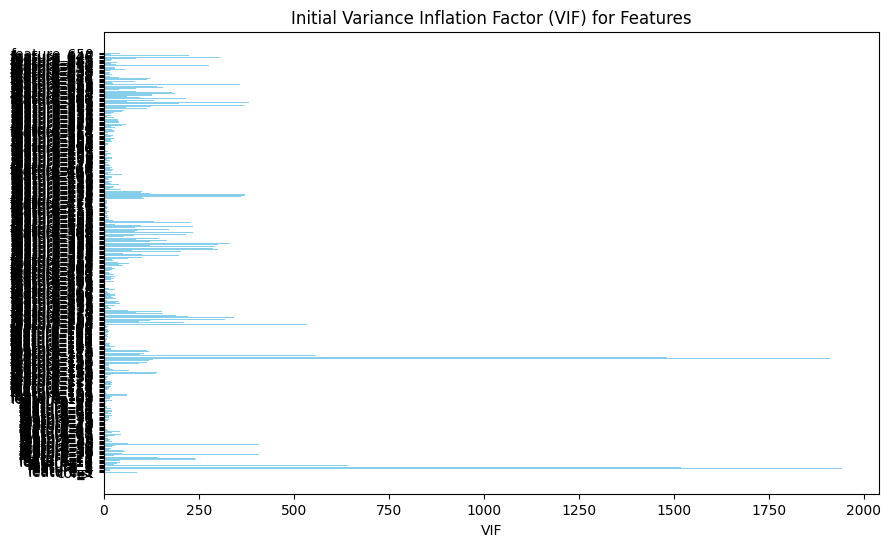


Initial VIF values for each feature:
         Feature          VIF
0          const    87.607384
1      feature_1    16.758983
2      feature_3    15.629616
3      feature_4  1942.630419
4      feature_5  1518.726453
..           ...          ...
372  feature_644    86.131427
373  feature_645   304.750261
374  feature_646   225.350307
375  feature_647    18.037031
376  feature_650    42.414114

[332 rows x 2 columns]


/home/nirav24/.local/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Final VIF values after dropping features:
         Feature          VIF
0          const    87.607384
1      feature_1    16.758983
2      feature_3    15.629616
3      feature_4  1942.630419
4      feature_5  1518.726453
..           ...          ...
372  feature_644    86.131427
373  feature_645   304.750261
374  feature_646   225.350307
375  feature_647    18.037031
376  feature_650    42.414114

[332 rows x 2 columns]


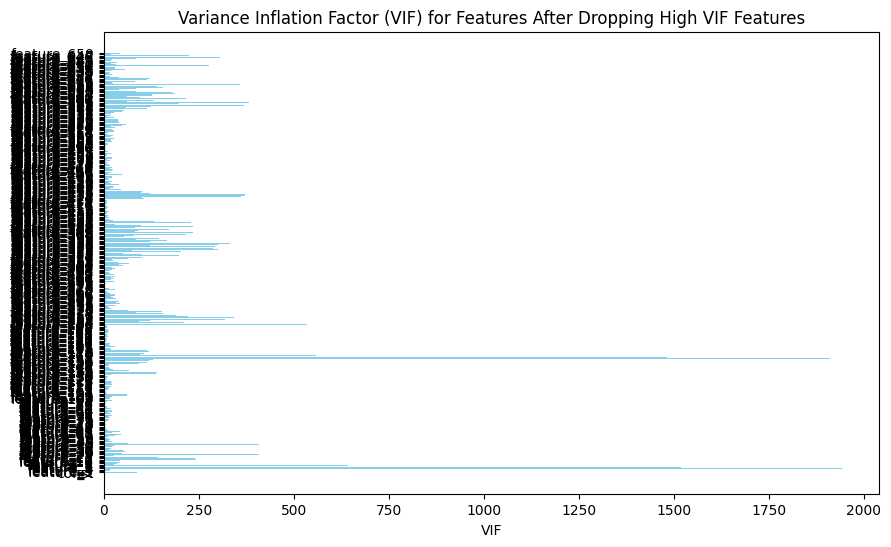


Shape of the dataset after removing high VIF features: (611, 376)


In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_selected is your feature matrix (DataFrame)
# X_selected = your_data

# Check for constant features and drop them
constant_features = X_selected.columns[X_selected.nunique() == 1]
X_selected = X_selected.drop(columns=constant_features)

# Check for highly correlated features and drop them (optional)
corr_matrix = X_selected.corr()
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:  # Adjust the threshold as needed
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

X_selected = X_selected.drop(columns=correlated_features)
print(f"Shape after dropping constant/correlated features: {X_selected.shape}")

# Add a constant to the model (for intercept)
X_with_const = sm.add_constant(X_selected)

# Function to calculate VIF for the current dataset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # Remove infinite or NaN VIF values
    vif_data = vif_data[~vif_data['VIF'].isin([np.inf, -np.inf, np.nan])]
    return vif_data


# Initial VIF calculation
vif_data = calculate_vif(X_with_const)

# Plot initial VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Initial Variance Inflation Factor (VIF) for Features')
plt.show()

print("\nInitial VIF values for each feature:")
print(vif_data)

# Define the threshold
threshold = 0.2 * 10**8

# Use a for loop to iterate over the features and remove those with VIF > threshold
features_to_drop = vif_data[vif_data['VIF'] > threshold]['Feature']

# Drop all features that exceed the threshold
for feature in features_to_drop:
    if feature in X_selected.columns:  # Check if the feature exists in X_selected
        print(f"Dropping feature '{feature}' with VIF: {vif_data[vif_data['Feature'] == feature]['VIF'].values[0]}")
        X_selected = X_selected.drop(columns=[feature])

# Recompute VIF for the remaining features
X_with_const = sm.add_constant(X_selected)
vif_data = calculate_vif(X_with_const)

# Display the final VIF values after dropping high VIF features
print("\nFinal VIF values after dropping features:")
print(vif_data)

# Plot VIF after dropping features
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Features After Dropping High VIF Features')
plt.show()

# Final shape of the dataset after dropping high VIF features
print(f"\nShape of the dataset after removing high VIF features: {X_selected.shape}")

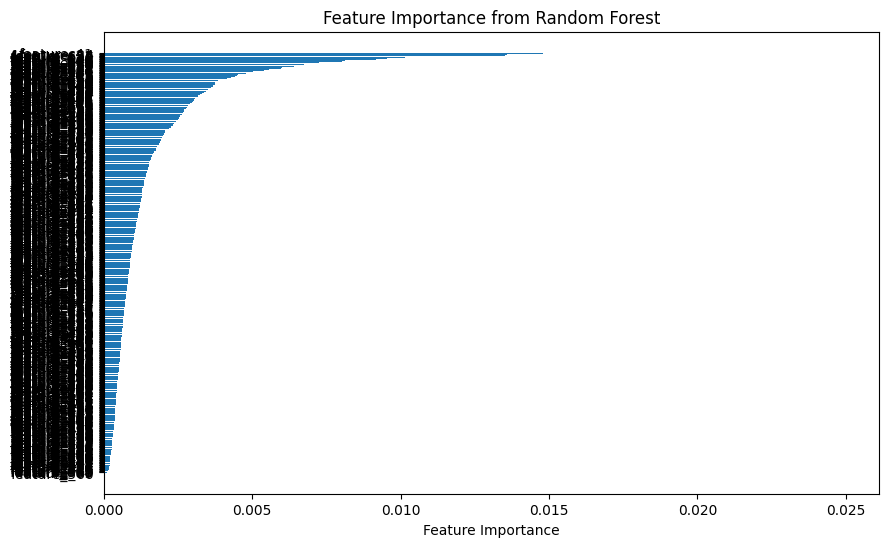

(499,)


In [9]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit a random forest model
model = RandomForestClassifier()
model.fit(X_selected, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_idx = importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_selected.columns[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Optionally, select features with importance greater than 0.005
selected_features = X_selected.columns[importances > 0.0005]
print(selected_features.shape)
X_selected = X_selected.drop(columns=X_selected.columns[importances < 0.0005])

In [11]:
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X_selected, y)

# Use X_selected.columns to match the feature set size
selected_features = X_selected.columns[info_gain > 0.05]

# Print selected features
print(selected_features)
print
X_selected = X_selected.drop(columns = X_selected.columns[info_gain < 0.5])

Index(['feature_1', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       ...
       'feature_638', 'feature_640', 'feature_641', 'feature_642',
       'feature_643', 'feature_644', 'feature_645', 'feature_646',
       'feature_647', 'feature_650'],
      dtype='object', length=364)


In [340]:
CURRENT = "MutualInfoClassification"

In [250]:
#method of feature selection 1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
print(X.shape)

lda = LDA(n_components=5)  # LDA can have a maximum of (number of classes - 1) components
X_reduced = lda.fit_transform(X, y)  # Transformed features for the classification model
print(X_reduced.shape)
#X_reduced

(611, 656)
(611, 5)


In [269]:
#method of feature selection 2
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
print(X.shape)

# Select top k features based on chi-square score
selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(abs(X), y)
print(X_selected.shape)
#X_selected

(611, 656)
(611, 10)


In [144]:
#method of feature selection 3
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier()
# Initialize RFE and fit to data
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)
print(X_rfe.shape)

#X_rfe

(611, 10)


In [287]:
#method of feature selection 4
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels
y_encoded = label_encoder.fit_transform(y)

# Fit the Lasso model now using the encoded target
lasso = Lasso(alpha=0.01).fit(X, y_encoded)
model = SelectFromModel(lasso, prefit=True)
X_lasso = model.transform(X)
print(X_lasso.shape)


(611, 245)


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.230e-01, tolerance: 2.744e-01

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



In [305]:
#method of feature selection 5
from sklearn.decomposition import PCA

# Initialize PCA and fit to data
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(X_pca.shape)


(611, 10)


In [323]:
#method of feature selection 6
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top k features based on mutual information score
selector = SelectKBest(mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)

In [344]:
#method of feature selection 7
from sklearn.feature_selection import mutual_info_classif

# Get information gain for each feature
info_gain = mutual_info_classif(X, y)
selected_features = X.columns[info_gain > 0.05]

# Print selected features
print(selected_features)

X_selected = X[selected_features]

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_646', 'feature_647', 'feature_648', 'feature_649',
       'feature_650', 'feature_651', 'feature_652', 'feature_653',
       'feature_654', 'feature_655'],
      dtype='object', length=628)


In [345]:
X_unlabelled = X_selected[y == 'NULL']        # For null values in y
X_labelled = X_selected[y != 'NULL']           # For non-null values in y
print(X_unlabelled.shape)
print(X_labelled.shape)
# Ensure X_labelled is a pandas DataFrame with the same index as y
X_labelled_df = pd.DataFrame(X_labelled, index=y[y != 'NULL'].index)

# Splitting into training (70%) and test (30%) datasets
X_train, X_test, y_train, y_test = train_test_split(X_labelled_df, y[y != 'NULL'], test_size=0.3, random_state=42)


(116, 628)
(495, 628)


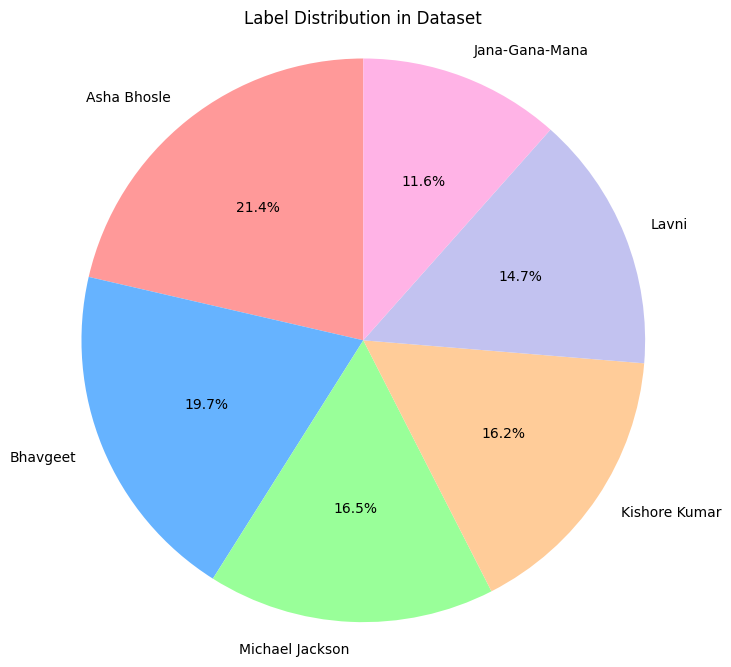

In [346]:

#making a pie chart to show weight of each label
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is a list of the labels in your dataset (replace it with your actual labels)
labels = ['Asha Bhosale', 'Kishore Kumar', 'Lavni', 'Michael Jackson', 'Jana Gana Mana', 'Bhavgeet']  

# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

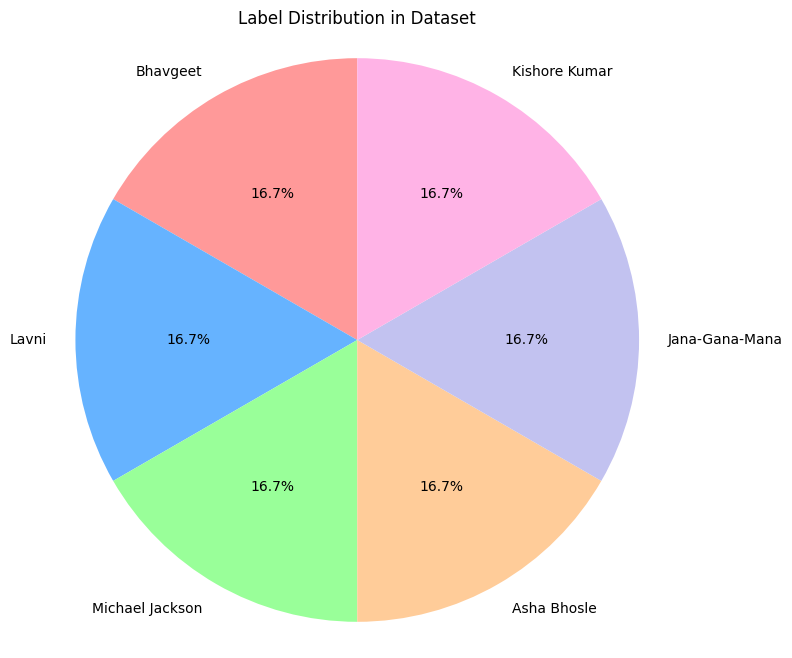

In [347]:
#from the above pie chart we can tell that the data is imbalanced, to fix the data imbalance we can use SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)


# Count the occurrences of each label in the 'labels' column using value_counts
label_counts = y_train.value_counts()

# Data for the pie chart
labels = label_counts.index
sizes = label_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Label Distribution in Dataset')

# Show the chart
plt.show()

In [348]:
from sklearn.preprocessing import LabelEncoder

#dimensional reduction

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

# Dictionary to store models and results
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    #'SVM': SVC(kernel='rbf', C=1.0, probability=True), # SVC with probability=True for probability estimates
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1),
    'SVC_linear': SVC(kernel='linear', probability=True),
    'SVC_rbf': SVC(kernel='rbf', probability=True),
    'RandomForest_1': RandomForestClassifier(min_samples_leaf=1),
    'RandomForest_3': RandomForestClassifier(min_samples_leaf=3),
    'RandomForest_5': RandomForestClassifier(min_samples_leaf=5),
    'NeuralNetwork_1': MLPClassifier(hidden_layer_sizes=(5)),
    'NeuralNetwork_2': MLPClassifier(hidden_layer_sizes=(5, 5)),
    'NeuralNetwork_3': MLPClassifier(hidden_layer_sizes=(5, 5, 5)),
    'NeuralNetwork_4': MLPClassifier(hidden_layer_sizes=(10))

}


In [350]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

def draw_roc_curve(model, X, y, label):
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=['x1', 'x2'])

    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X)
    else:
        y_prob = model.decision_function(X)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())

    fpr, tpr, _ = roc_curve(pd.get_dummies(y).values.ravel(), y_prob.ravel())
    auc_score = roc_auc_score(pd.get_dummies(y), y_prob, multi_class='ovr')
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {CURRENT}')
    plt.tight_layout()
    plt.legend()


Training Logistic Regression...



Training K-Nearest Neighbors...



Training Random Forest...



Training Gradient Boosting...



Training AdaBoost...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.




Training Naive Bayes...



Training Decision Tree...



Training XGBoost...



Training SVC_linear...



Training SVC_rbf...



Training RandomForest_1...



Training RandomForest_3...



Training RandomForest_5...



Training NeuralNetwork_1...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_2...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_3...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Training NeuralNetwork_4...


/home/nirav24/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Metrics have been saved to model_evaluation_metrics.csv


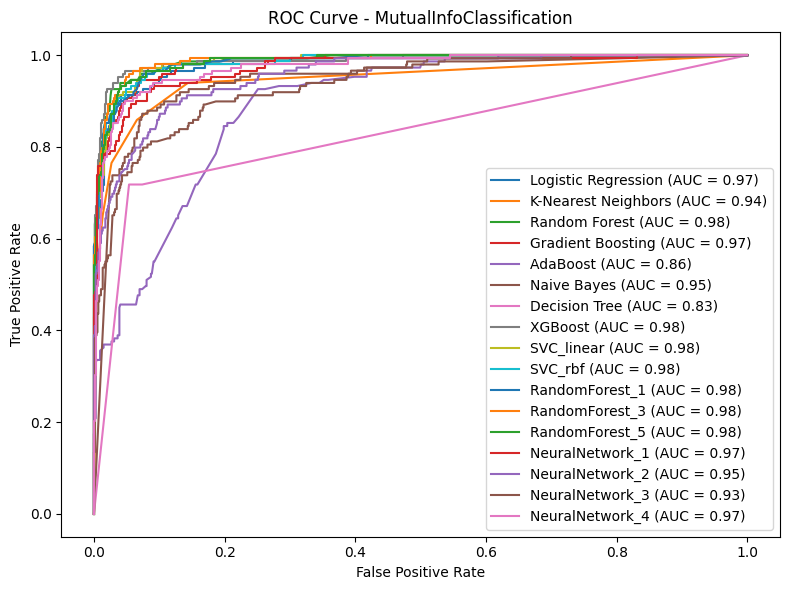

In [351]:
import plotly.graph_objects as go
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

results = {}

plt.figure(figsize=(8, 6))

# Training, prediction, and metric calculations
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train_encoded)  # Train the model
    y_pred_train = model.predict(X_train) #Predict on train set
    y_pred_test = model.predict(X_test)  # Predict on the test set

    precisions = [classification_report(y_test_encoded, y_pred_test, output_dict=True)[str(i)]['precision'] for i in range(6)]
    recalls = [classification_report(y_test_encoded, y_pred_test, output_dict=True)[str(i)]['recall'] for i in range(6)]
    f1_scores = [classification_report(y_test_encoded, y_pred_test, output_dict=True)[str(i)]['f1-score'] for i in range(6)]
    
    # Storing metrics
    results[model_name] = {
        "Accuracy_Train": accuracy_score(y_train_encoded, y_pred_train),
        "Accuracy_Test": accuracy_score(y_test_encoded, y_pred_test),
        "Precision_Train": precision_score(y_train_encoded, y_pred_train, average='weighted'),
        "Precision_Test": precision_score(y_test_encoded, y_pred_test, average='weighted'),
        "Recall_Train": recall_score(y_train_encoded, y_pred_train, average='weighted'),
        "Recall_Test": recall_score(y_test_encoded, y_pred_test, average='weighted'),
        "F1 Score_Train": f1_score(y_train_encoded, y_pred_train, average='weighted'),
        "F1 Score_Test": f1_score(y_test_encoded, y_pred_test, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test_encoded, y_pred_test),
        "Classification Report": classification_report(y_train_encoded, y_pred_train),
        "Classification Report": classification_report(y_test_encoded, y_pred_test),
    }

    # Plotting the ROC curve
    draw_roc_curve(model, X_test, y_test_encoded, model_name)

    # Plotting the confusion matrix using Plotly with numbers displayed and square grid
    confusion_mat = results[model_name]["Confusion Matrix"]
    fig = go.Figure(data=go.Heatmap(
        z=confusion_mat,
        x=[f"Predicted {i}" for i in range(len(confusion_mat))],
        y=[f"Actual {i}" for i in range(len(confusion_mat))],
        colorscale="Blues",
        text=confusion_mat,  # Display numbers in each cell
        texttemplate="%{text}",  # Format to show text values
        showscale=True
    ))
    fig.update_layout(
        title=f"Confusion Matrix for {model_name}",
        xaxis_title="Predicted Label",
        yaxis_title="Actual Label",
        xaxis=dict(scaleanchor="y", scaleratio=1)  # Ensures square cells
    )
    fig.show()

plt.savefig(f'Images/roc_curve_{CURRENT}.png', dpi=500)

# Saving the metrics to a CSV file
metrics = []
for model_name, metric_dict in results.items():
    metrics.append({
        "Model": model_name,
        "Accuracy_Train": metric_dict["Accuracy_Train"],
        "Accuracy_Test": metric_dict["Accuracy_Test"],
        "Precision_Train": metric_dict["Precision_Train"],
        "Precision_Test": metric_dict["Precision_Test"],
        "Recall_Train": metric_dict["Recall_Train"],
        "Recall_Test": metric_dict["Recall_Test"],
        "F1 Score_Train": metric_dict["F1 Score_Train"],
        "F1 Score_Test": metric_dict["F1 Score_Test"],
    })

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)

# Save to CSV
df_metrics.to_csv(f'Metrics/{CURRENT}_model_evaluation_metrics.csv', index=False)

print("Metrics have been saved to model_evaluation_metrics.csv")

In [352]:

# Display the results
for model_name, metrics in results.items():
    print(f"\nMetrics for {model_name}:\n")
    for metric, value in metrics.items():
        print(f"{metric}:\n{value}\n")



Metrics for Logistic Regression:

Accuracy_Train:
0.9954954954954955

Accuracy_Test:
0.8456375838926175

Precision_Train:
0.9954954954954955

Precision_Test:
0.8482810216089549

Recall_Train:
0.9954954954954955

Recall_Test:
0.8456375838926175

F1 Score_Train:
0.9954954954954955

F1 Score_Test:
0.8445931125233557

Confusion Matrix:
[[16  4  0  0  3  0]
 [ 1 22  0  0  1  1]
 [ 0  0 17  0  0  0]
 [ 0  0  1 35  0  0]
 [ 3  3  0  0 16  1]
 [ 1  0  2  0  2 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        23
           1       0.76      0.88      0.81        25
           2       0.85      1.00      0.92        17
           3       1.00      0.97      0.99        36
           4       0.73      0.70      0.71        23
           5       0.91      0.80      0.85        25

    accuracy                           0.85       149
   macro avg       0.83      0.84      0.83       149
weighted avg       0.85   

In [353]:
print("\nAll Models Accuracy:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Accuracy_Train']:.4f}", f"{model_name}: {metrics['Accuracy_Test']:.4f}")


All Models Accuracy:
Logistic Regression: 0.9955 Logistic Regression: 0.8456
K-Nearest Neighbors: 0.8784 K-Nearest Neighbors: 0.8121
Random Forest: 0.9955 Random Forest: 0.8993
Gradient Boosting: 0.9955 Gradient Boosting: 0.8523
AdaBoost: 0.6689 AdaBoost: 0.6040
Naive Bayes: 0.8716 Naive Bayes: 0.7651
Decision Tree: 0.9932 Decision Tree: 0.7181
XGBoost: 0.9955 XGBoost: 0.9195
SVC_linear: 0.9955 SVC_linear: 0.8725
SVC_rbf: 0.9752 SVC_rbf: 0.8725
RandomForest_1: 0.9955 RandomForest_1: 0.8859
RandomForest_3: 0.9932 RandomForest_3: 0.8859
RandomForest_5: 0.9775 RandomForest_5: 0.9128
NeuralNetwork_1: 0.9572 NeuralNetwork_1: 0.8255
NeuralNetwork_2: 0.9392 NeuralNetwork_2: 0.7315
NeuralNetwork_3: 0.9820 NeuralNetwork_3: 0.7383
NeuralNetwork_4: 0.9932 NeuralNetwork_4: 0.8456


In [354]:
print("\nAll Models Precison:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Precision_Train']:.4f}", f"{model_name}: {metrics['Precision_Test']:.4f}")


All Models Precison:
Logistic Regression: 0.9955 Logistic Regression: 0.8483
K-Nearest Neighbors: 0.8802 K-Nearest Neighbors: 0.8148
Random Forest: 0.9956 Random Forest: 0.9027
Gradient Boosting: 0.9956 Gradient Boosting: 0.8584
AdaBoost: 0.6840 AdaBoost: 0.6350
Naive Bayes: 0.8743 Naive Bayes: 0.7741
Decision Tree: 0.9934 Decision Tree: 0.7320
XGBoost: 0.9956 XGBoost: 0.9233
SVC_linear: 0.9955 SVC_linear: 0.8708
SVC_rbf: 0.9756 SVC_rbf: 0.8753
RandomForest_1: 0.9955 RandomForest_1: 0.8855
RandomForest_3: 0.9933 RandomForest_3: 0.8885
RandomForest_5: 0.9780 RandomForest_5: 0.9134
NeuralNetwork_1: 0.9630 NeuralNetwork_1: 0.8310
NeuralNetwork_2: 0.9491 NeuralNetwork_2: 0.7197
NeuralNetwork_3: 0.9825 NeuralNetwork_3: 0.7394
NeuralNetwork_4: 0.9934 NeuralNetwork_4: 0.8435


In [355]:
print("\nAll Models Recall:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['Recall_Train']:.4f}", f"{model_name}: {metrics['Recall_Test']:.4f}")


All Models Recall:
Logistic Regression: 0.9955 Logistic Regression: 0.8456
K-Nearest Neighbors: 0.8784 K-Nearest Neighbors: 0.8121
Random Forest: 0.9955 Random Forest: 0.8993
Gradient Boosting: 0.9955 Gradient Boosting: 0.8523
AdaBoost: 0.6689 AdaBoost: 0.6040
Naive Bayes: 0.8716 Naive Bayes: 0.7651
Decision Tree: 0.9932 Decision Tree: 0.7181
XGBoost: 0.9955 XGBoost: 0.9195
SVC_linear: 0.9955 SVC_linear: 0.8725
SVC_rbf: 0.9752 SVC_rbf: 0.8725
RandomForest_1: 0.9955 RandomForest_1: 0.8859
RandomForest_3: 0.9932 RandomForest_3: 0.8859
RandomForest_5: 0.9775 RandomForest_5: 0.9128
NeuralNetwork_1: 0.9572 NeuralNetwork_1: 0.8255
NeuralNetwork_2: 0.9392 NeuralNetwork_2: 0.7315
NeuralNetwork_3: 0.9820 NeuralNetwork_3: 0.7383
NeuralNetwork_4: 0.9932 NeuralNetwork_4: 0.8456


In [356]:
print("\nAll Models f1-Score:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics['F1 Score_Train']:.4f}", f"{model_name}: {metrics['F1 Score_Test']:.4f}")


All Models f1-Score:
Logistic Regression: 0.9955 Logistic Regression: 0.8446
K-Nearest Neighbors: 0.8783 K-Nearest Neighbors: 0.8113
Random Forest: 0.9955 Random Forest: 0.9003
Gradient Boosting: 0.9955 Gradient Boosting: 0.8543
AdaBoost: 0.6687 AdaBoost: 0.6132
Naive Bayes: 0.8716 Naive Bayes: 0.7610
Decision Tree: 0.9932 Decision Tree: 0.7208
XGBoost: 0.9955 XGBoost: 0.9195
SVC_linear: 0.9955 SVC_linear: 0.8700
SVC_rbf: 0.9753 SVC_rbf: 0.8720
RandomForest_1: 0.9955 RandomForest_1: 0.8855
RandomForest_3: 0.9933 RandomForest_3: 0.8867
RandomForest_5: 0.9776 RandomForest_5: 0.9128
NeuralNetwork_1: 0.9582 NeuralNetwork_1: 0.8252
NeuralNetwork_2: 0.9401 NeuralNetwork_2: 0.7222
NeuralNetwork_3: 0.9820 NeuralNetwork_3: 0.7290
NeuralNetwork_4: 0.9932 NeuralNetwork_4: 0.8439


In [357]:
#show decision boundary
#ROC Curve

In [358]:
#identify the three songs of each category
#showcase the waveform for each of the three songs found for each category

In [389]:
def draw_decision_boundary(model, X, y, resolution=100, size=10, edgecolor='k'):
    print(X, y, X.shape, y.shape)
    # Ensure you use .iloc for pandas DataFrame indexing
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors=edgecolor, cmap='viridis', s=size)


In [392]:
# Specify the folder where you want to save the files
output_folder = 'labeled_data_files'
os.makedirs(output_folder, exist_ok=True)

# Dictionary to store labeled data for each model
labeled_data_files = {}
# Assuming `X_unlabelled` and `models` are already defined
unlabelled_data = X_unlabelled.copy()  # Original features
unlabelled_data = pd.DataFrame(unlabelled_data)

# Loop through each model, predict labels on the original features, and save results
for model_name, model in models.items():
    print(f"Labeling data using {model_name}...")

    # Predict the labels using the original unlabelled data
    predictions = model.predict(unlabelled_data)

    # Add predictions to the unlabelled data
    labeled_data = unlabelled_data.copy()
    labeled_data['Predicted_Label'] = predictions

    # Save the labeled data to a CSV file
    filename = os.path.join(output_folder, f"{CURRENT}_{model_name}_labeled_data.csv")
    
    # Perform PCA to reduce the data to 2 components for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(unlabelled_data)  # Use original data for PCA

    print(unlabelled_data.shape)

    # Plot decision boundary using PCA-reduced data
    plt.figure(figsize=(10, 6))
    draw_decision_boundary(model, X_unlabelled, predictions)
    plt.title(f'Decision Boundary for {model_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.savefig(f'Images/decision_boundary_{CURRENT}_{model_name}.png', dpi=500)
    plt.show()

    # Save the labeled data to a CSV file
    labeled_data.to_csv(filename, index=False)
    labeled_data_files[model_name] = filename
    print(f"Labeled data saved to {filename}")

print("Done")

Labeling data using Logistic Regression...
(116, 628)
     feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
495  -0.241129  -0.309264  -0.644416  -2.232537  -1.111002   0.460030   
496   1.883387   0.419525  -1.626025   0.981529   0.144432  -1.237912   
497   1.069734   0.258578   1.076768  -0.066466   0.557626   0.200054   
498   2.198962  -0.168691   2.248656   0.353203   2.125967   0.684794   
499  -0.473128  -1.139129  -0.948869  -0.640892  -0.542923  -0.271985   
..         ...        ...        ...        ...        ...        ...   
606  -1.251535   0.031800   0.775216  -0.514499   0.900251   1.853636   
607   0.184437   0.110758  -0.206720   0.961074   0.738822   0.310959   
608   1.193131  -0.445248   0.739152  -0.159610   0.664055  -0.384713   
609   1.065715   0.676211   1.146552   1.014801   1.512249   1.811500   
610   0.556256  -0.427497  -1.825659   0.698945   0.439629  -1.212952   

     feature_7  feature_8  feature_9  feature_10  ...  feature_646  \

/home/nirav24/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



ValueError: X has 2 features, but LogisticRegression is expecting 628 features as input.

<Figure size 1000x600 with 0 Axes>

In [360]:
import os
import pandas as pd

# Specify the folder where the labeled data files are stored
output_folder = 'labeled_data_files'

# Initialize a dictionary to store the frequency of labels for each file
label_frequencies = {}

# Iterate through each CSV file in the directory
for filename in os.listdir(output_folder):
    if filename.endswith('.csv'):  # Ensure we are processing CSV files
        file_path = os.path.join(output_folder, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Check if 'Predicted_Label' column exists
        if 'Predicted_Label' in df.columns:
            # Count the frequency of labels in the 'Predicted_Label' column
            label_counts = df['Predicted_Label'].value_counts()
            
            # Store the frequencies in the dictionary
            label_frequencies[filename] = label_counts
        else:
            print(f"Warning: 'Predicted_Label' column not found in {filename}")

# Print the label frequencies for each file
for filename, label_count in label_frequencies.items():
    print(f"Label frequencies in {filename}:")
    print(label_count)
    print()


Label frequencies in NeuralNetwork_1_labeled_data.csv:
Predicted_Label
0    40
4    27
2    18
1    11
5    10
3    10
Name: count, dtype: int64

Label frequencies in RandomForest_1_labeled_data.csv:
Predicted_Label
0    45
2    19
4    17
3    15
5    13
1     7
Name: count, dtype: int64

Label frequencies in SVC_rbf_labeled_data.csv:
Predicted_Label
0    47
2    20
3    19
4    16
5    11
1     3
Name: count, dtype: int64

Label frequencies in Gradient Boosting_labeled_data.csv:
Predicted_Label
0    33
4    28
3    18
2    18
5    15
1     4
Name: count, dtype: int64

Label frequencies in NeuralNetwork_2_labeled_data.csv:
Predicted_Label
4    47
2    20
3    20
5    15
0     9
1     5
Name: count, dtype: int64

Label frequencies in AdaBoost_labeled_data.csv:
Predicted_Label
0    58
1    26
2    14
3    10
5     7
4     1
Name: count, dtype: int64

Label frequencies in RandomForest_5_labeled_data.csv:
Predicted_Label
0    42
4    24
2    19
3    15
5    12
1     4
Name: count, dtype: 